# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [147]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
#from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

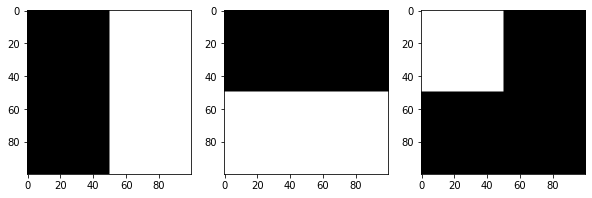

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


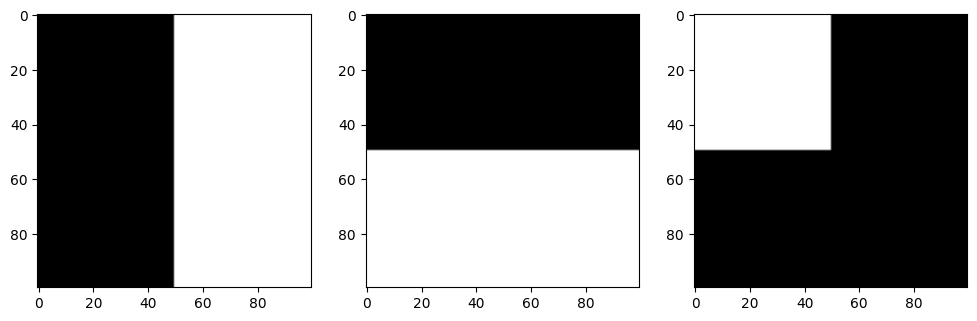

In [148]:
# solution

# start with a black square for all images
square_1 = np.zeros((100,100))
square_2 = np.zeros((100,100))  
square_3 = np.zeros((100,100))  

# square 1: 
square_1[:,50:] = 1 # set the last half of columns to white

# square_2:
square_2[50:,:] = 1 # set the last half of rows to white

# square_3:
square_3[:50,:50] = 1 # set the first half of rows and columns to white




fig, axes = plt.subplots(1, 3 , figsize=(12,4))
axes[0].imshow(square_1, cmap = 'grey')
axes[1].imshow(square_2, cmap = 'grey')
axes[2].imshow(square_3, cmap = 'grey')



*   Use the above three images to create the following image

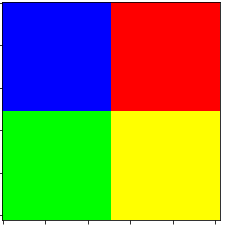
*Hint: Remember channels and color spaces*

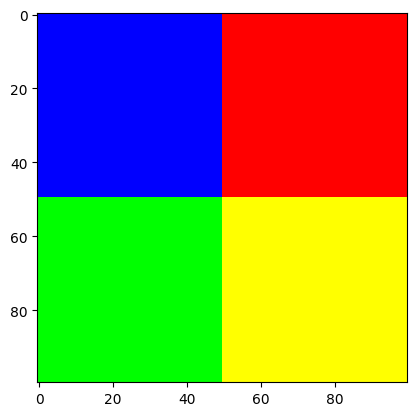

In [149]:
# solution

# Create a black RGB square

image_ = np.zeros((100,100,3)) # the last dimension (3) inidcates the RGB color code

# define the blue part
image_[:50,:50] = [0, 0, 1] # code for Blue RGB

# define the green part
image_[50:,:50] = [0, 1, 0] # code for green RGB

# define the red part
image_[:50,50:] = [1, 0, 0] # code for red RGB

# define the yellow part 
image_[50:,50:] = [1, 1, 0] # code for yellow RGB

plt.imshow(image_)
plt.show()






### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

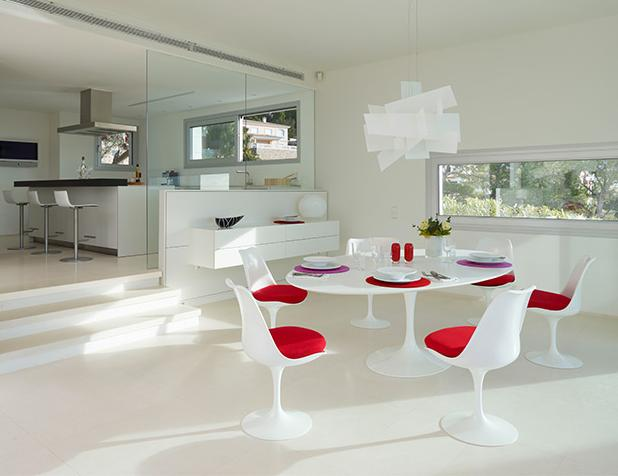

*   Extract individual channels and plot them using matplotlib subplot.



(np.float64(-0.5), np.float64(617.5), np.float64(475.5), np.float64(-0.5))

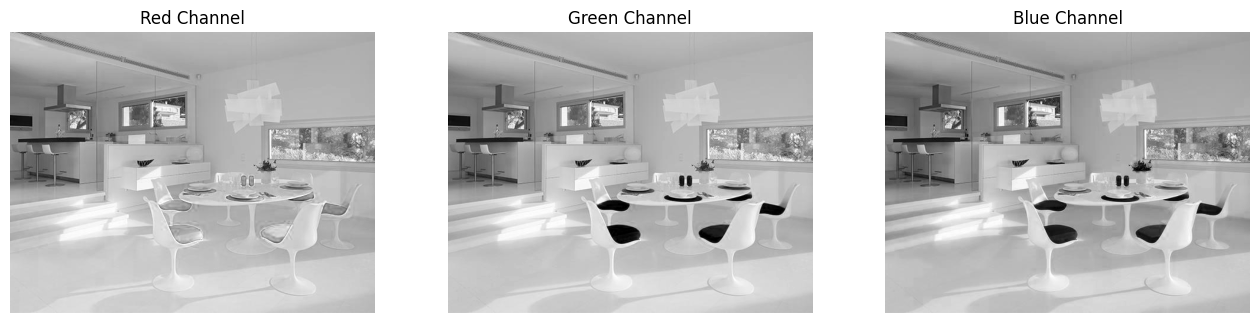

In [150]:
# solution
from PIL import Image

image = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/sillas.jpg')

# Split the image into r, g, b chanels using split() from PIL
r, g, b = image.split()

# Plot the individual channels
fig, axes = plt.subplots(1, 3 , figsize=(16,4))

axes[0].imshow(r, cmap = 'grey',)
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap = 'grey')
axes[1].set_title('Green Channel')
axes[1].axis('off')   

axes[2].imshow(b, cmap = 'grey')
axes[2].set_title('Blue Channel')
axes[2].axis('off')   

# Display an individul image channel using default computer viewer
#r.show(title="Red Channel")
#g.show(title="Green Channel")
#b.show(title="Black Channel")





*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [151]:
# solution
from numpy import asarray

# Convert image to numpy to array
image_array = asarray(image).copy()
image_array




array([[[196, 202, 192],
        [190, 196, 186],
        [175, 181, 171],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[184, 190, 180],
        [193, 199, 189],
        [202, 208, 198],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[204, 207, 198],
        [199, 202, 193],
        [193, 196, 187],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       ...,

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [181, 182, 176],
        [182, 183, 177],
        [182, 183, 177]],

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [182, 183, 177],
        [181, 182, 176],
        [181, 182, 176]],

       [[205, 200, 194],
        [205, 200, 194],
        [205, 200, 194],
        ...,
        [187, 188, 182],
        [184, 185, 179],
        [184, 185, 179]]

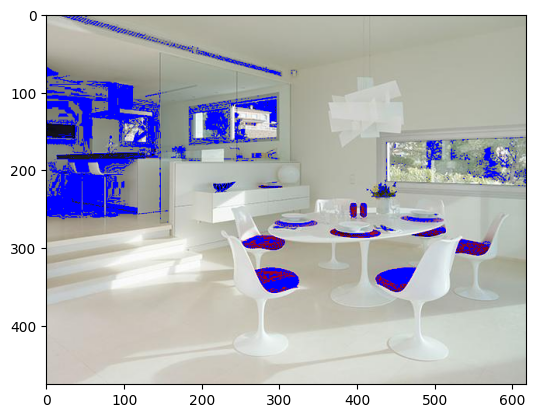

In [152]:
# Iterate through each pixel

# Get the dimensions of the array
height, width, channels = image_array.shape

for i in range(height):
    for j in range(width):
        # get the rgb values of current pixel
        r , g , b = image_array[i,j] 
       
        # Check if that pixel is red. lets define r>150 & g<100 & b<100
        if r>150 & g<100 & b<100:
            # if the condition is true then lets set the pixel to blue
            image_array[i,j]=[0,0,255]

# Convert the array back to image
blue_image = Image.fromarray(image_array)

# Display the image
plt.imshow(blue_image)








# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

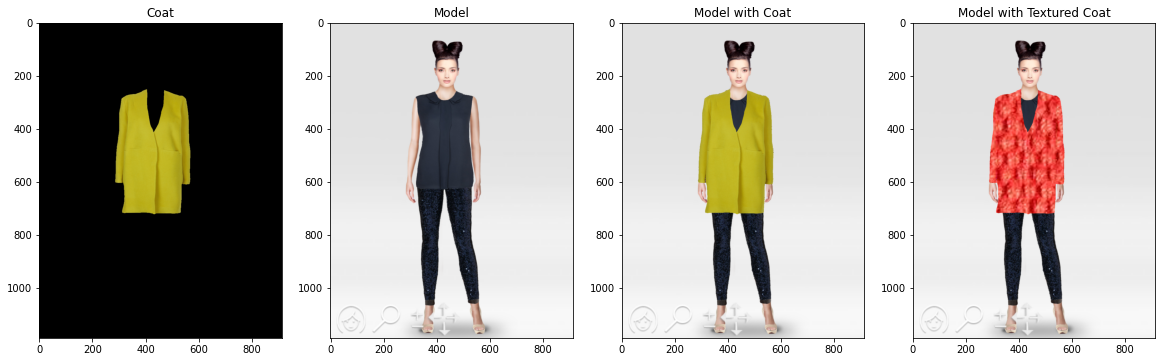

In [153]:
# solution
# Import the images
coat = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/coat.png')
model = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/model.png')


# Convert images to numpy array
coat_array = np.asarray(coat)
model_array = np.asarray(model)
model_coat = np.zeros_like(model_array)



# Model wearing yellow coat

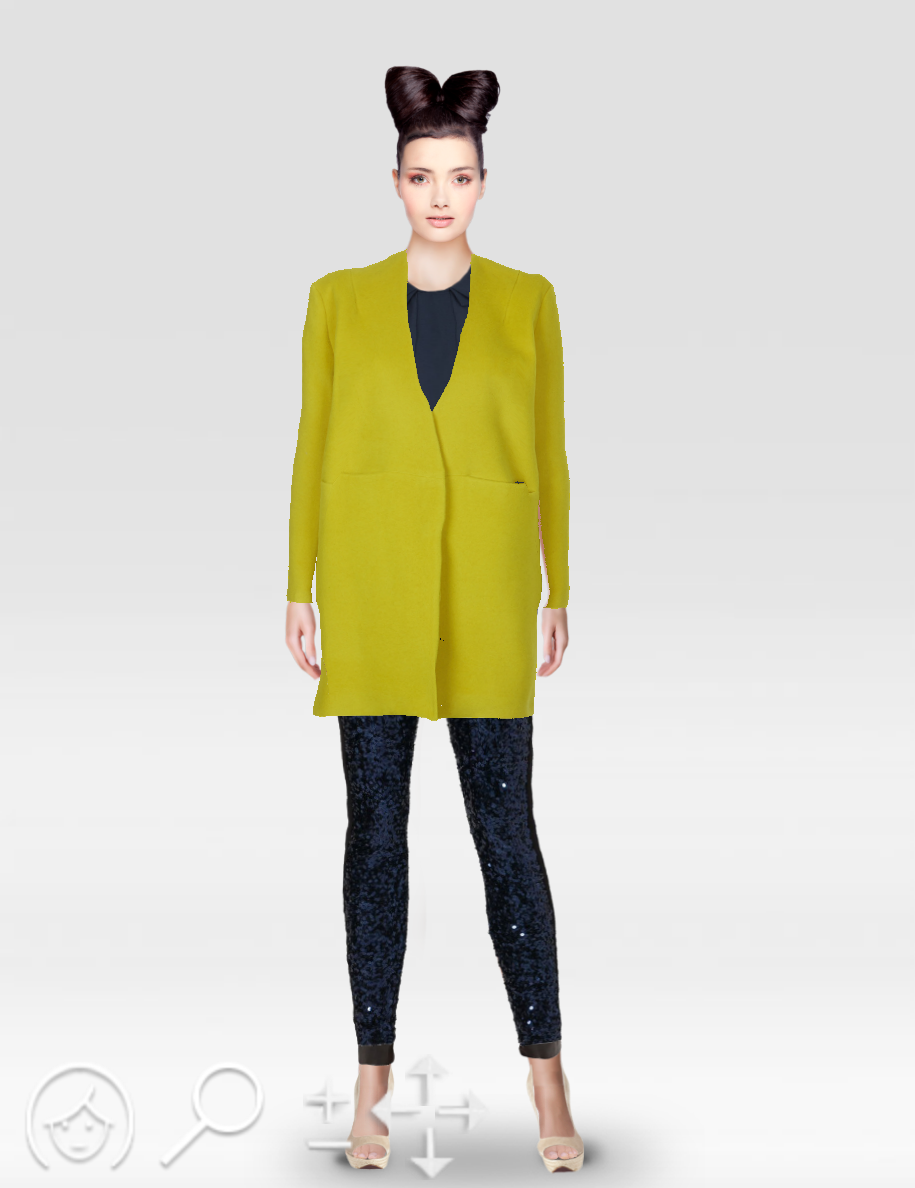

In [154]:

# Put the coat on the model
height, width, channels = coat_array.shape
for i in range(height):
               for j in range(width):
                       # select only pixels that belong to jacket, i.e. the yellow pixels:
                       if coat_array[i,j][0] >= 125 and coat_array[i,j][1] >= 125 and coat_array[i,j][2] <= 100:
                               model_coat[i,j] = coat_array[i,j]
                       else:
                               model_coat[i,j] = model_array[i,j]



yellow_coat = Image.fromarray(model_coat)

yellow_coat

In [155]:
# Import the textures images
texture1 = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/texture.png')
texture2 = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/texture2.png')
texture3 = Image.open('/Users/tiagovhp/Ironhack/Week_6/Day_2/lab-computer-vision/images/texture3.jpg')

# Convert images to numpy array
texture1 = np.asarray(texture1)
texture2 = np.asarray(texture2)
texture3 = np.asarray(texture3)





# Model wearing red coat

original shape: (1188, 915, 3)


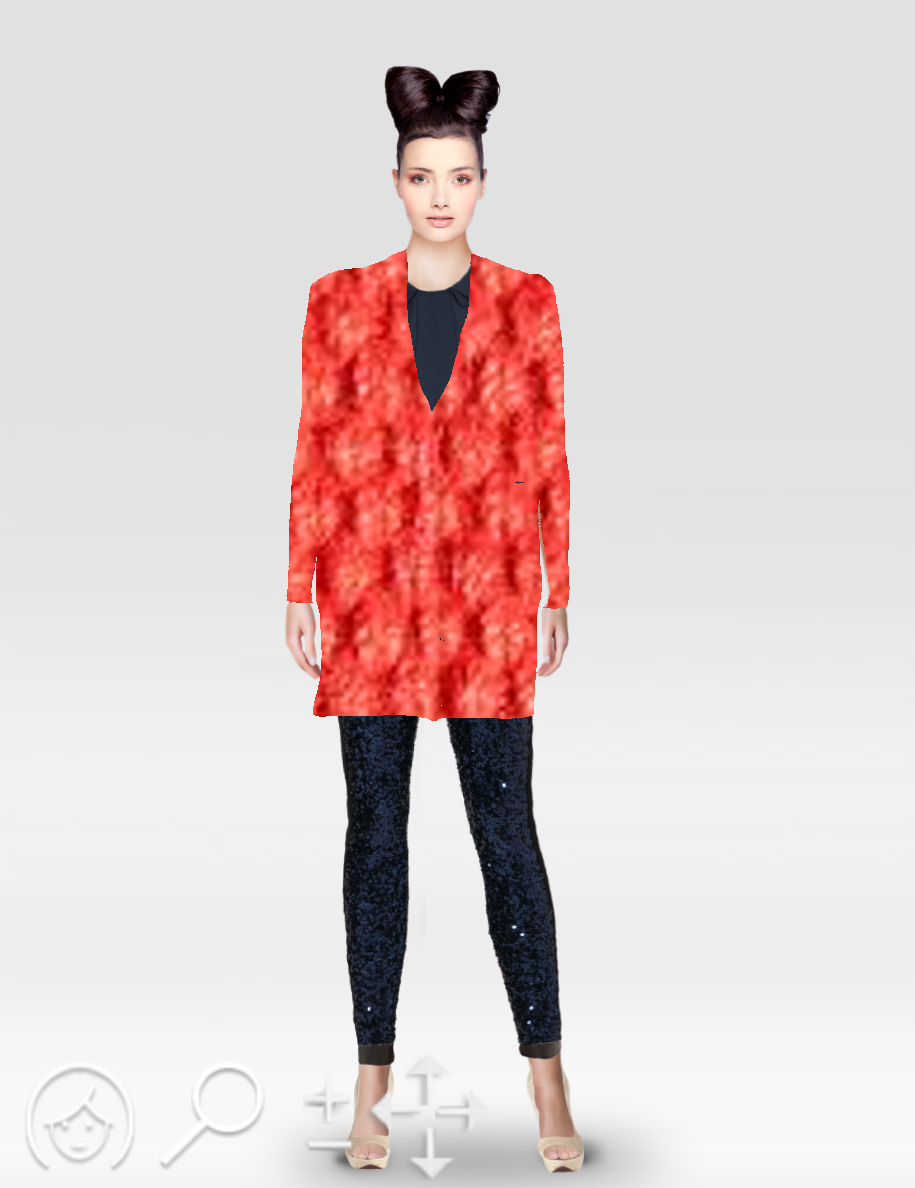

In [156]:

# Check the dimensions of textures
print("original shape:",texture2.shape)

# We need to add a new channel to the transparency2 image.
# easisest way is: to convert image from numpy to PIL Image -> convert RGB to RGBA (extra channel) -> back to numpy array
## Convert numpy image to PIL Image
texture2 = Image.fromarray(texture2)
## Convert RGB to RGBA
texture2 = texture2.convert('RGBA')
## Convert back to numpy
texture2 = np.asarray(texture2)

# Initialize a new coat with size of coat
new_coat = np.zeros_like(coat_array)

for i in range(height):
               for j in range(width):
                       # select only pixels that belong to jacket, i.e. the yellow pixels:
                       if coat_array[i,j][0] >= 125 and coat_array[i,j][1] >= 125 and coat_array[i,j][2] <= 100:
                               new_coat[i,j] = texture2[i,j]
                       else:
                               new_coat[i,j] = coat_array[i,j]

Image.fromarray(new_coat)

# Put the new_coat on the model
for i in range(height):
               for j in range(width):
                       # select only pixels that belong to jacket, i.e. the yellow pixels:
                       if coat_array[i,j][0] >= 125 and coat_array[i,j][1] >= 125 and coat_array[i,j][2] <= 100:
                               model_coat[i,j] = new_coat[i,j]
                       else:
                               model_coat[i,j] = model_array[i,j]

Image.fromarray(model_coat)

# Model wearing texture 1

original shape: (183, 275, 3)


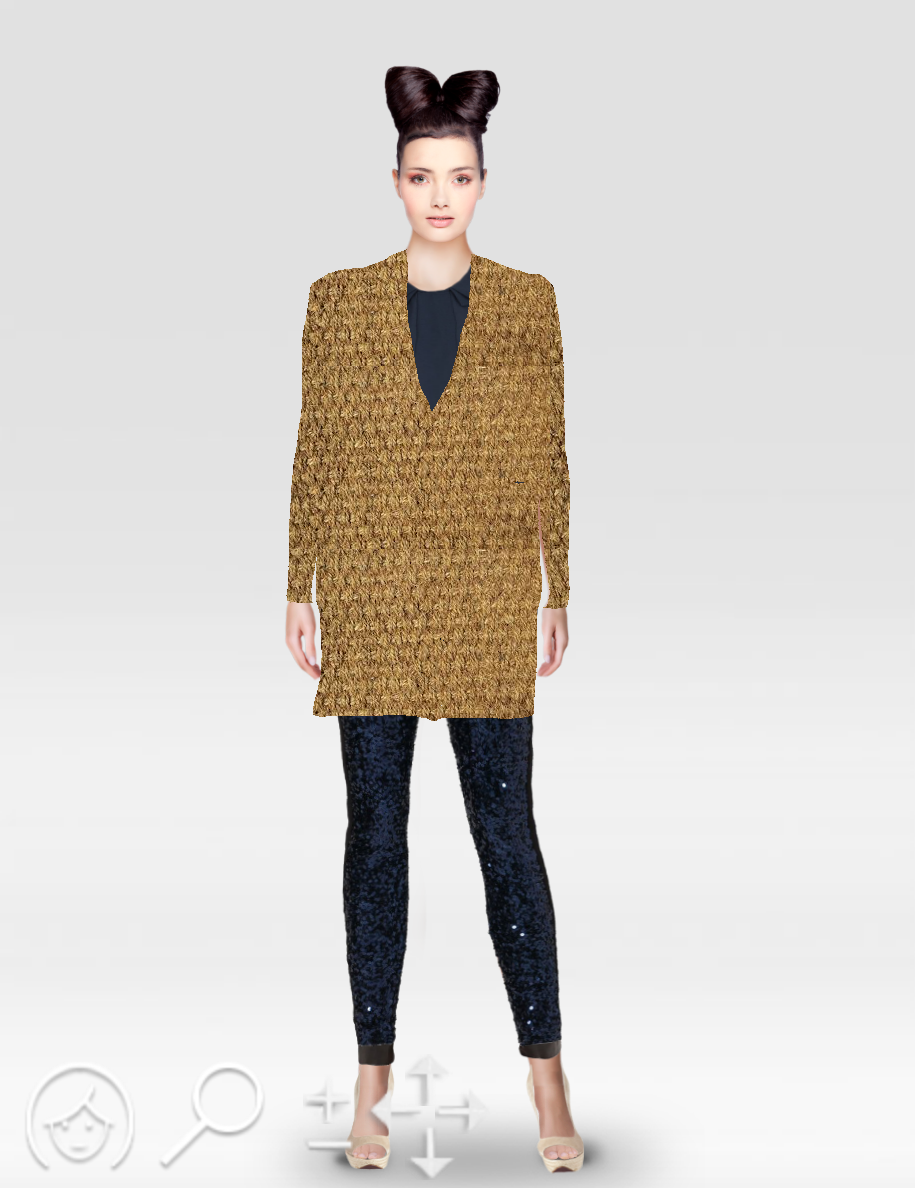

In [157]:
# Check the dimensions of textures
print("original shape:",texture1.shape)

# Tile te texture 1 to exceed the target image size (coat)
tiled_image = np.tile(texture1,(7,4,1))

# Crop the tiled image to match the desired size (1188, 915, 3)
croped_image = tiled_image[:1188,:915,:]

# Add alpha (transparency) dimension
## Convert to PIL Image
new_image = Image.fromarray(croped_image)
## Convert to RGBA
texture1_final = new_image.convert("RGBA")
## Convert back to numpy
texture1_final = np.asarray(texture1_final)

Image.fromarray(new_coat)

# Put the texture on the model
for i in range(height):
               for j in range(width):
                       # select only pixels that belong to jacket, i.e. the yellow pixels:
                       if coat_array[i,j][0] >= 125 and coat_array[i,j][1] >= 125 and coat_array[i,j][2] <= 100:
                               model_coat[i,j] = texture1_final[i,j]
                       else:
                               model_coat[i,j] = model_array[i,j]

Image.fromarray(model_coat)

# Model wearing texture 3

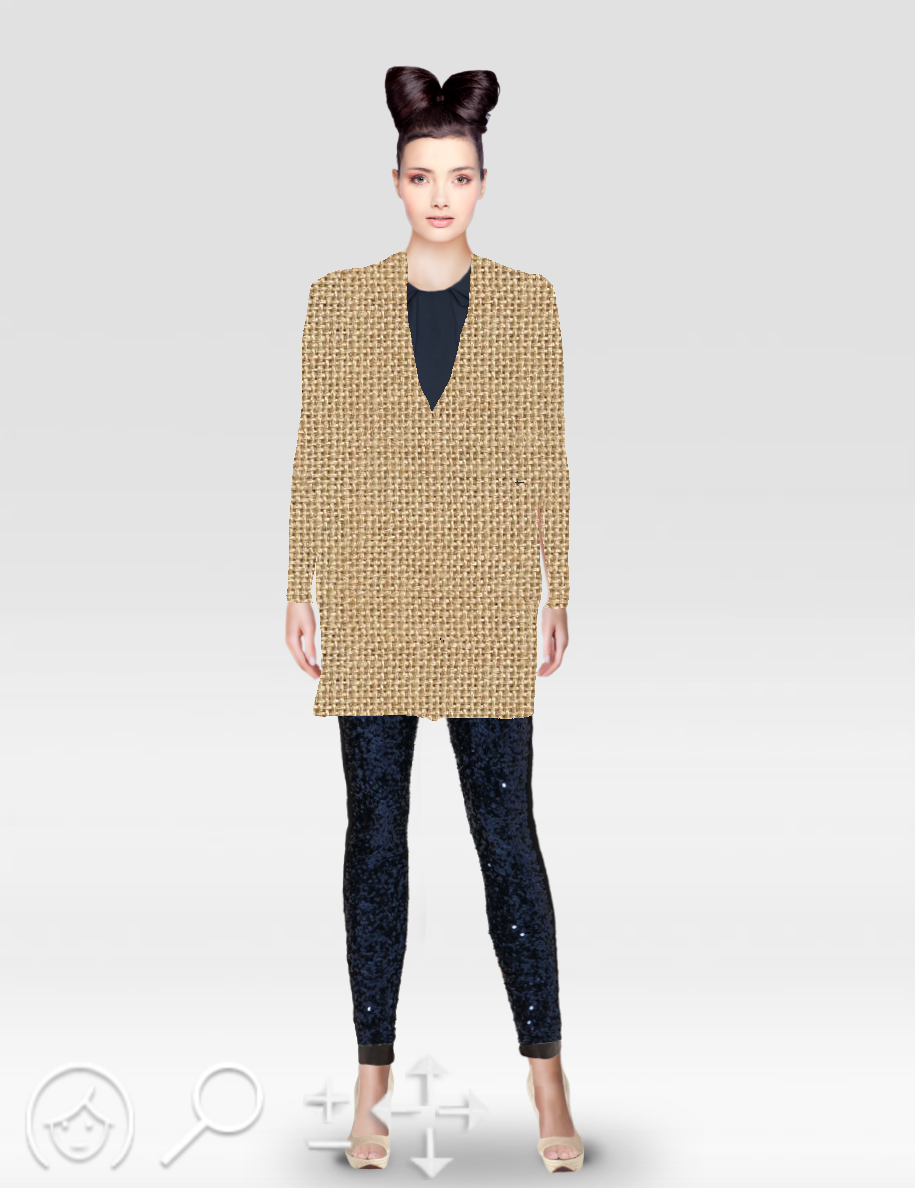

In [158]:
# Size of the texture 3 image

texture3.shape

# Tile the image to exceed the coat image size
tiled_image_2 = np.tile(texture3,(4,3,1))

# Crop the tiled image to the exact dimensions of coat image size
croped_image = tiled_image_2[:1188,:915,:]

# Add one extra dimension (alpha / transparency)
## Convert to PIL image
croped_image = Image.fromarray(croped_image)
## Convert from RGB to RGBA
new_pattern = croped_image.convert("RGBA")
## Convert back to numpy
new_pattern = np.asarray(new_pattern)

new_pattern.shape


# Put the new pattern on the model
for i in range(height):
               for j in range(width):
                       # select only pixels that belong to jacket, i.e. the yellow pixels:
                       if coat_array[i,j][0] >= 125 and coat_array[i,j][1] >= 125 and coat_array[i,j][2] <= 100:
                               model_coat[i,j] = new_pattern[i,j]
                       else:
                               model_coat[i,j] = model_array[i,j]

Image.fromarray(model_coat)


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




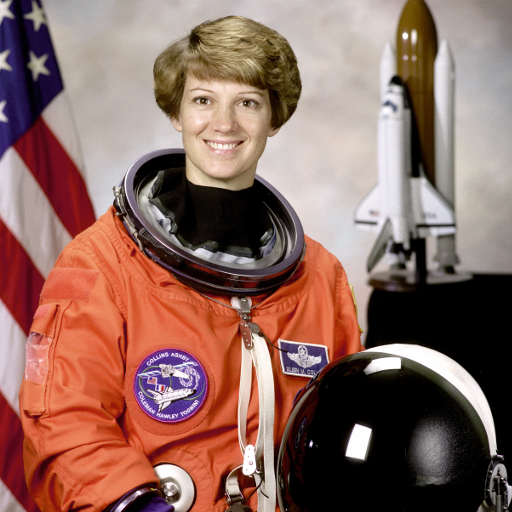

In [159]:
# Install skimage (scikit-image)
!pip install scikit-image

# Import necessary modules from skimage
from skimage import data

# Load sample images
astronaut_image = data.astronaut()
moon_image = data.moon()
coins_image = data.coins()

# Read the astronaut image
Image.fromarray(astronaut_image)




In [179]:
# Convert to grayscale
astronaut_image.shape

# lets creat a vector with the grayscale for each pixel
height, width, channels = astronaut_image.shape

# Create a zeros array of size (512,512)
gray_astro = np.zeros(shape=(height,width))

# Asign to the first chanel the dimension grayscale
for i in range(height):
    for j in range(width):
        gray_astro[i,j] = (astronaut_image[i,j,0]*.2989 + 
                           astronaut_image[i,j,1]*0.5870 + 
                           astronaut_image[i,j,2]*0.1140
                           )
# remove the 2nd and 3rd channels


gray_image = Image.fromarray(gray_astro)

gray_image.show()

gray_image = np.asarray(gray_image)



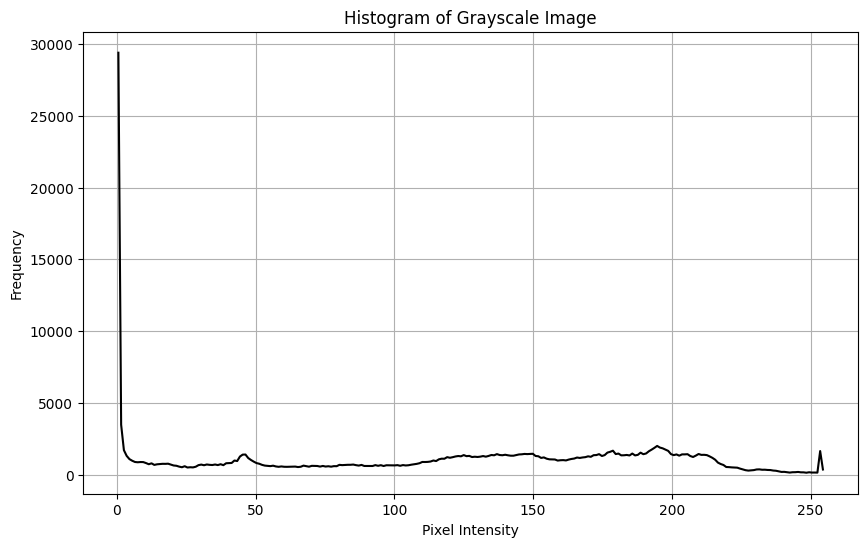

In [182]:
# Create histogram of the image
from skimage.exposure import histogram
# Assuming `gray_image` is already defined and is a grayscale image
hist, bin_centers = histogram(gray_image)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
#plt.xlim(0, 1)  # Adjust the x-axis limit for normalized grayscale values
plt.grid()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

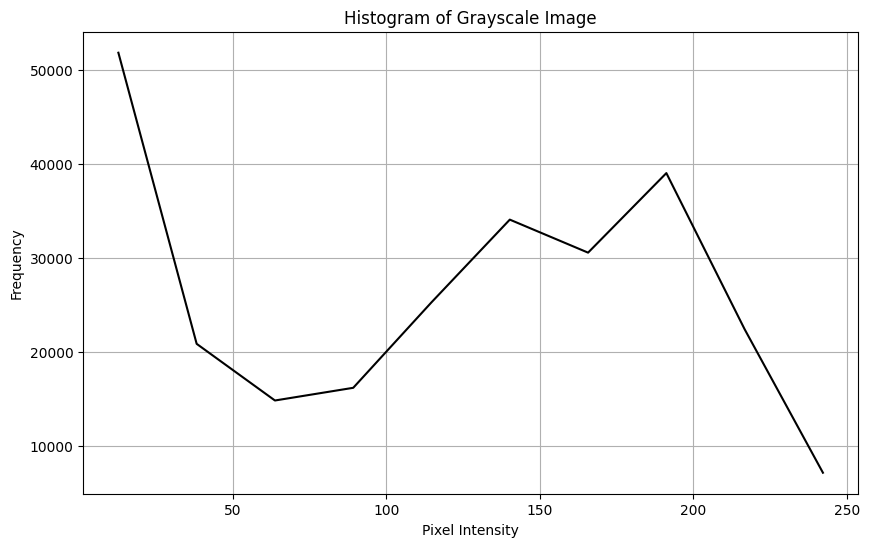

In [186]:
# solution
# Assuming `gray_image` is already defined and is a grayscale image
hist, bin_centers = histogram(gray_image,nbins=8)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
#plt.xlim(0, 1)  # Adjust the x-axis limit for normalized grayscale values
plt.grid()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


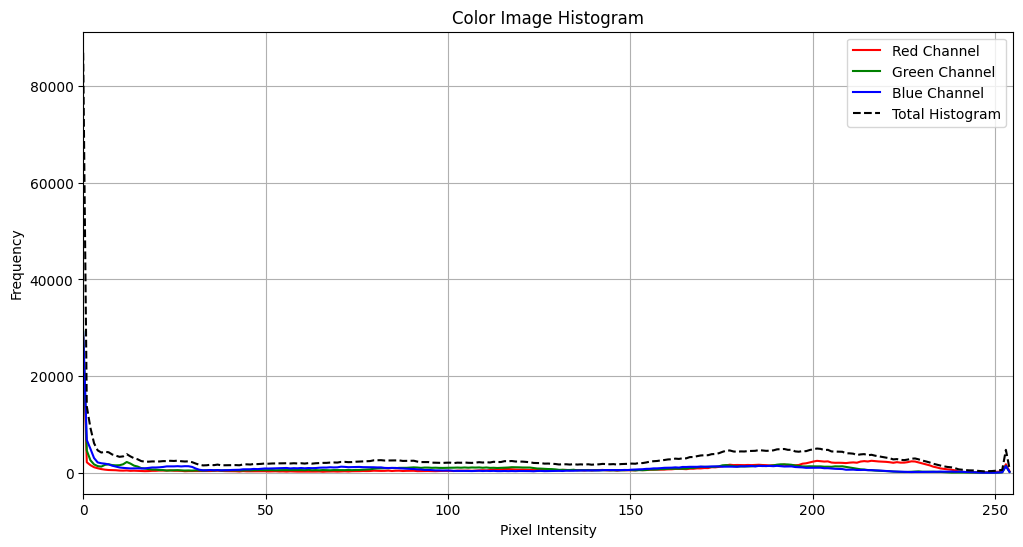

In [187]:
# Separate the image into R, G, B channels
red_channel = astronaut_image[:, :, 0]
green_channel = astronaut_image[:, :, 1]
blue_channel = astronaut_image[:, :, 2]

# Compute histograms for each channel
red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 255))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 255))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 255))

# Calculate the total histogram
total_hist = red_hist + green_hist + blue_hist

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the histograms
plt.plot(red_bins[:-1], red_hist, color='red', label='Red Channel')
plt.plot(green_bins[:-1], green_hist, color='green', label='Green Channel')
plt.plot(blue_bins[:-1], blue_hist, color='blue', label='Blue Channel')
plt.plot(red_bins[:-1], total_hist, color='black', label='Total Histogram', linestyle='dashed')

# Configure the plot
plt.title('Color Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.legend()
plt.grid()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [164]:
# solution




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [165]:
# solution



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [166]:
# solution



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [167]:
# solution



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...